In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Training Data

In [3]:
data=pd.read_excel('Data_Train.xlsx')

In [4]:
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [5]:
data.shape

(6019, 12)

In [6]:
data.dropna(inplace=True)
data.reset_index(drop=True,inplace=True)

In [7]:
data.shape

(5975, 12)

In [8]:
L1=[]
for i in data['Transmission']:
    if i not in L1:
        L1.append(i)
L1

['Manual', 'Automatic']

In [9]:
L1=[]
for i in data['Owner_Type']:
    if i not in L1:
        L1.append(i)
L1

['First', 'Second', 'Fourth & Above', 'Third']

In [10]:
L1=[]
for i in data['Fuel_Type']:
    if i not in L1:
        L1.append(i)
L1

['CNG', 'Diesel', 'Petrol', 'LPG']

In [11]:
L1=[]
for i in data['Location']:
    if i not in L1:
        L1.append(i)
L1

['Mumbai',
 'Pune',
 'Chennai',
 'Coimbatore',
 'Hyderabad',
 'Jaipur',
 'Kochi',
 'Kolkata',
 'Delhi',
 'Bangalore',
 'Ahmedabad']

In [12]:
L2=[]
a=[]
for i in data['Name']:
    a=i.split(' ')
    if a[0] not in L2:
        L2.append(a[0])
print(L2)
print(len(L2))

['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota', 'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault', 'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun', 'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep', 'Smart', 'Ambassador', 'Isuzu', 'ISUZU', 'Force', 'Bentley', 'Lamborghini']
31


In [13]:
def f4(s):
    a=[]
    a=s.split(' ')
    for i in range(len(L2)):
        if a[0]==L2[i]:
            return i
        
def f5(s):
    for i in range(len(L1)):
        if s==L1[i]:
            return i

In [14]:
def f1(s):
    if s=='Manual':
        return 0
    else:
        return 1
def f2(s):
    if s=='CNG':
        return 0
    elif s=='Diesel':
        return 1
    elif s=='Petrol':
        return 2
    else:
        return 3
def f3(s):
    if s=="First":
        return 0
    elif s=='Second':
        return 1
    elif s=='Third':
        return 2
    else:
        return 3

In [15]:
data["Transmission_numeric"]=data.Transmission.apply(f1)
data["Fuel_Type_numeric"]=data.Fuel_Type.apply(f2)
data["Owner_Type_numeric"]=data.Owner_Type.apply(f3)
del data['Transmission']
del data['Fuel_Type']
del data['Owner_Type']
data.head()

,Name,Location,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Transmission_numeric,Fuel_Type_numeric,Owner_Type_numeric
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,0,0,0
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,0,1,0
2,Honda Jazz V,Chennai,2011,46000,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,0,2,0
3,Maruti Ertiga VDI,Chennai,2012,87000,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,0,1,0
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,1,1,1


In [16]:
data["Name_numeric"]=data.Name.apply(f4)
data["Location_numeric"]=data.Location.apply(f5)
del data['Location']
del data['Name']

In [17]:
def f6(s):
    return s

In [18]:
data['Price_']=data.Price.apply(f6)
del data['Price']

In [19]:
data.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Transmission_numeric,Fuel_Type_numeric,Owner_Type_numeric,Name_numeric,Location_numeric,Price_
0,2010,72000,26.6 km/kg,998 CC,58.16 bhp,5.0,0,0,0,0,0,1.75
1,2015,41000,19.67 kmpl,1582 CC,126.2 bhp,5.0,0,1,0,1,1,12.50
2,2011,46000,18.2 kmpl,1199 CC,88.7 bhp,5.0,0,2,0,2,2,4.50
3,2012,87000,20.77 kmpl,1248 CC,88.76 bhp,7.0,0,1,0,0,2,6.00
4,2013,40670,15.2 kmpl,1968 CC,140.8 bhp,5.0,1,1,1,3,3,17.74


In [20]:
a=[]
for i in range(len(data['Year'])):
    a=data['Mileage'][i].split(' ')
    data['Mileage'][i]=a[0]
    a=data['Engine'][i].split(' ')
    data['Engine'][i]=a[0]
    a=data['Power'][i].split(' ')
    data['Power'][i]=a[0]

/Users/sankalpaggarwal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/sankalpaggarwal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/sankalpaggarwal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [21]:
data.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Transmission_numeric,Fuel_Type_numeric,Owner_Type_numeric,Name_numeric,Location_numeric,Price_
0,2010,72000,26.6,998,58.16,5.0,0,0,0,0,0,1.75
1,2015,41000,19.67,1582,126.2,5.0,0,1,0,1,1,12.50
2,2011,46000,18.2,1199,88.7,5.0,0,2,0,2,2,4.50
3,2012,87000,20.77,1248,88.76,7.0,0,1,0,0,2,6.00
4,2013,40670,15.2,1968,140.8,5.0,1,1,1,3,3,17.74


In [22]:
data.shape

(5975, 12)

In [23]:
for i in range(len(data['Mileage'])):
    if data['Power'][i]=='null':
        data.drop(i,inplace=True)

In [24]:
data.reset_index(drop=True,inplace=True)

In [25]:
data.shape

(5872, 12)

In [26]:
data.isnull().sum()

Year                    0
Kilometers_Driven       0
Mileage                 0
Engine                  0
Power                   0
Seats                   0
Transmission_numeric    0
Fuel_Type_numeric       0
Owner_Type_numeric      0
Name_numeric            0
Location_numeric        0
Price_                  0
dtype: int64

In [27]:
data.dtypes

Year                      int64
Kilometers_Driven         int64
Mileage                  object
Engine                   object
Power                    object
Seats                   float64
Transmission_numeric      int64
Fuel_Type_numeric         int64
Owner_Type_numeric        int64
Name_numeric              int64
Location_numeric          int64
Price_                  float64
dtype: object

In [28]:
data['Mileage']=pd.to_numeric(data['Mileage'])
data['Engine']=pd.to_numeric(data['Engine'])
data['Power']=pd.to_numeric(data['Power'])

In [29]:
train_data=np.array(data,int)
train_data

array([[ 2010, 72000,    26, ...,     0,     0,     1],
       [ 2015, 41000,    19, ...,     1,     1,    12],
       [ 2011, 46000,    18, ...,     2,     2,     4],
       ...,
       [ 2012, 55000,    14, ...,    13,     5,     2],
       [ 2013, 46000,    18, ...,     0,     7,     2],
       [ 2011, 47000,    25, ...,    19,     4,     2]])

In [30]:
x_train=train_data[:,:-1]
y_train=train_data[:,-1]

# Training Data

In [31]:
data2=pd.read_excel('Data_Test.xlsx')
data2.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0


In [32]:
data2.shape

(1234, 11)

In [33]:
data2.dropna(inplace=True)
data2.reset_index(drop=True,inplace=True)

In [34]:
data2.shape

(1223, 11)

In [35]:
data2["Transmission_numeric"]=data2.Transmission.apply(f1)
data2["Fuel_Type_numeric"]=data2.Fuel_Type.apply(f2)
data2["Owner_Type_numeric"]=data2.Owner_Type.apply(f3)
data2["Name_numeric"]=data2.Name.apply(f4)
data2["Location_numeric"]=data2.Location.apply(f5)
del data2['Transmission']
del data2['Fuel_Type']
del data2['Owner_Type']
del data2['Location']
del data2['Name']

In [36]:
data2.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Transmission_numeric,Fuel_Type_numeric,Owner_Type_numeric,Name_numeric,Location_numeric
0,2014,40929,32.26 km/kg,998 CC,58.2 bhp,4.0,0,0,0,0.0,8
1,2013,54493,24.7 kmpl,796 CC,47.3 bhp,5.0,0,2,1,0.0,3
2,2017,34000,13.68 kmpl,2393 CC,147.8 bhp,7.0,0,1,0,5.0,0
3,2012,139000,23.59 kmpl,1364 CC,null bhp,5.0,0,1,0,5.0,4
4,2014,29000,18.5 kmpl,1197 CC,82.85 bhp,5.0,0,2,0,1.0,0


In [37]:
a=[]
for i in range(len(data2['Year'])):
    a=data2['Mileage'][i].split(' ')
    data2['Mileage'][i]=a[0]
    a=data2['Engine'][i].split(' ')
    data2['Engine'][i]=a[0]
    a=data2['Power'][i].split(' ')
    data2['Power'][i]=a[0]

/Users/sankalpaggarwal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/sankalpaggarwal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/sankalpaggarwal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [38]:
data2.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Transmission_numeric,Fuel_Type_numeric,Owner_Type_numeric,Name_numeric,Location_numeric
0,2014,40929,32.26,998,58.2,4.0,0,0,0,0.0,8
1,2013,54493,24.7,796,47.3,5.0,0,2,1,0.0,3
2,2017,34000,13.68,2393,147.8,7.0,0,1,0,5.0,0
3,2012,139000,23.59,1364,null,5.0,0,1,0,5.0,4
4,2014,29000,18.5,1197,82.85,5.0,0,2,0,1.0,0


In [39]:
data2.shape

(1223, 11)

In [40]:
for i in range(len(data2['Mileage'])):
    if data2['Power'][i]=='null':
        data2.drop(i,inplace=True)

In [41]:
data2.reset_index(drop=True,inplace=True)

In [42]:
data2.shape

(1201, 11)

In [43]:
data2.isnull().sum()

Year                    0
Kilometers_Driven       0
Mileage                 0
Engine                  0
Power                   0
Seats                   0
Transmission_numeric    0
Fuel_Type_numeric       0
Owner_Type_numeric      0
Name_numeric            1
Location_numeric        0
dtype: int64

In [44]:
for i in range(len(data2['Mileage'])):
    if data2['Name_numeric'][i]=='null':
        data2.drop(i,inplace=True)

In [45]:
data2.reset_index(drop=True,inplace=True)

In [46]:
data2.shape

(1201, 11)

In [47]:
data2['Mileage']=pd.to_numeric(data2['Mileage'])
data2['Engine']=pd.to_numeric(data2['Engine'])
data2['Power']=pd.to_numeric(data2['Power'])

In [48]:
data2.dtypes

Year                      int64
Kilometers_Driven         int64
Mileage                 float64
Engine                    int64
Power                   float64
Seats                   float64
Transmission_numeric      int64
Fuel_Type_numeric         int64
Owner_Type_numeric        int64
Name_numeric            float64
Location_numeric          int64
dtype: object

In [49]:
test_data=np.array(data2,int)
test_data

array([[ 2014, 40929,    32, ...,     0,     0,     8],
       [ 2013, 54493,    24, ...,     1,     0,     3],
       [ 2017, 34000,    13, ...,     0,     5,     0],
       ...,
       [ 2012, 28000,    23, ...,     0,     4,     7],
       [ 2013, 52262,    17, ...,     2,     6,     1],
       [ 2014, 72443,    10, ...,     0,    11,     6]])

In [50]:
x_test=test_data[:,:]

# Linear Regression Algo

In [51]:
alg1=LinearRegression()

In [52]:
alg1.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [53]:
y_train_pred=alg1.predict(x_train)

In [54]:
y_train_pred=y_train_pred.reshape(-1,1)

In [55]:
y_train_pred

array([[-0.34615291],
       [12.97170669],
       [ 1.27585227],
       ...,
       [ 6.06366151],
       [ 0.66880655],
       [-2.50870084]])

In [56]:
y_test_pred=alg1.predict(x_test)

In [57]:
y_test_pred

array([ 3.5272336 , -3.42714535, 17.34866826, ...,  0.60755957,
        7.94993889, 22.24941108])

In [58]:
y_test_pred=y_test_pred.reshape(-1,1)

In [59]:
y_test_pred

array([[ 3.5272336 ],
       [-3.42714535],
       [17.34866826],
       ...,
       [ 0.60755957],
       [ 7.94993889],
       [22.24941108]])

In [71]:
alg1.score(x_train,y_train)

0.6979366149755946

# Random Forest Algo

In [101]:
from sklearn.ensemble import RandomForestRegressor 

In [102]:
alg2=RandomForestRegressor(n_estimators = 100, random_state = 0,max_depth=6)

In [103]:
alg2.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=6, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [104]:
y_train_pred2=alg2.predict(x_train)

In [105]:
y_train_pred2=y_train_pred2.reshape(-1,1)

In [106]:
y_train_pred2

array([[1.82841758],
       [8.59831194],
       [2.8946817 ],
       ...,
       [6.61951637],
       [2.43925176],
       [2.1049467 ]])

In [107]:
y_pred2=alg2.predict(x_test)

In [108]:
y_pred2=y_pred2.reshape(-1,1)

In [109]:
y_pred2

array([[ 2.88818669],
       [ 2.36535448],
       [16.1357908 ],
       ...,
       [ 2.81624298],
       [ 4.0754633 ],
       [20.76651179]])

In [110]:
alg2.score(x_train,y_train)

0.9130783409657929

# Visualisation of difference of predictions between Linear Regression and Random Forest

In [111]:
import matplotlib.pyplot as plt

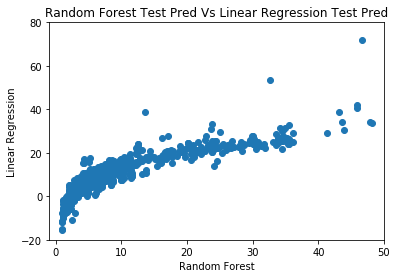

In [113]:
plt.scatter(y_pred2,y_test_pred)
plt.xlabel('Random Forest')
plt.ylabel('Linear Regression')
plt.axis([-1,50,-20,80])
plt.title('Random Forest Test Pred Vs Linear Regression Test Pred')
plt.show()

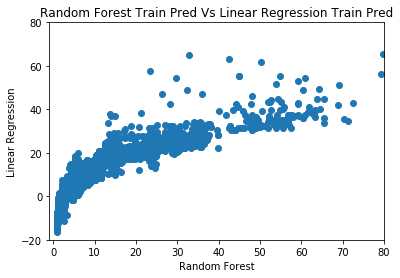

In [114]:
plt.scatter(y_train_pred2,y_train_pred)
plt.xlabel('Random Forest')
plt.ylabel('Linear Regression')
plt.axis([-1,80,-20,80])
plt.title('Random Forest Train Pred Vs Linear Regression Train Pred')
plt.show()

# X_train Vs X_train_Pred

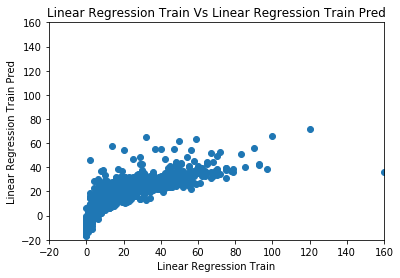

In [115]:
plt.scatter(y_train,y_train_pred)
plt.xlabel('Linear Regression Train')
plt.ylabel('Linear Regression Train Pred')
plt.axis([-20,160,-20,160])
plt.title('Linear Regression Train Vs Linear Regression Train Pred')
plt.show()

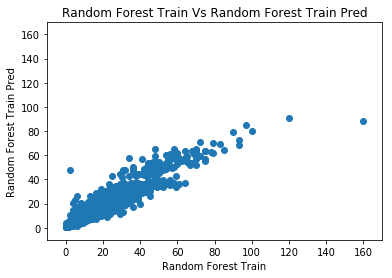

In [116]:
plt.scatter(y_train,y_train_pred2)
plt.xlabel('Random Forest Train')
plt.ylabel('Random Forest Train Pred')
plt.axis([-10,170,-10,170])
plt.title('Random Forest Train Vs Random Forest Train Pred')
plt.show()